# ICT1508C Applied Statistics

*Probability Distributions Using Python*

>Filename:     &emsp;&emsp;`ICT1508C_Topic06-4_Py-Prob-Dists_Lesson_v2025-1.1.ipynb`<br>
>Version:      &emsp;&emsp;&ensp; `2025-1.1`<br>
>Description:  &ensp;&ensp;Jupyter notebook for ICT1508C lesson on Probability Distributions Using Python.<br>
>Module:       &emsp;&emsp;&ensp;ICT1508C<br>
>Type:         &emsp;&emsp;&emsp;&ensp; Lesson<br>
>Prepared by:  &ensp;Nicholas H L Wong<br>
>Organisation: &nbsp;Singapore Institute of Technology<br>
>Division:     &emsp;&emsp;&ensp;Infocomm Technology<br>
>Attribution:  &emsp;Copyright &copy; 2025 Nicholas H L Wong – All Rights Reserved<br>

## Setup

In [1]:
# Import necessary packages
import numpy as np
from scipy import stats
from scipy.special import comb
import matplotlib.pyplot as plt

## Discrete Probability Distributions

### Generic Discrete Distribution

The following table summarises the number of late arrivals of students who attend a certain school on 5 mornings of a particular week.

| Number of days arrived late | Number of pupils |
| -: | -: |
| 0 | 275 |
| 1 | 111 |
| 2 | 33 |
| 3 | 12 |
| 4 | 13 |
| 5 | 16 |

In [2]:
n_pupils = np.array([275, 111, 33, 12, 13, 16])     # Frequencies

In [3]:
x_arr = np.arange(len(n_pupils))    # Range of values of the random variable

#### Q: Plot the probability distribution of the data.

In [4]:
pr = n_pupils/np.sum(n_pupils)      # Probabilities
pr

array([0.59782609, 0.24130435, 0.07173913, 0.02608696, 0.02826087,
       0.03478261])

In [5]:
np.sum(pr)

1.0

In [6]:
# Create a custom discrete probability distribution
my_dist = stats.rv_discrete(name='my_dist', values=(x_arr, pr))

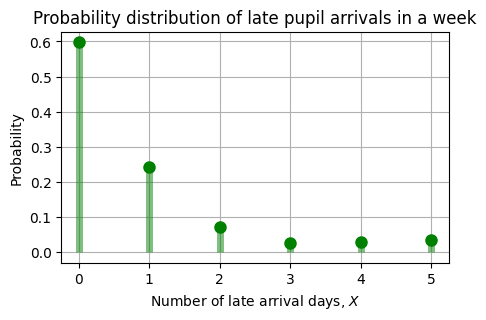

In [7]:
# Create a figure and grab the axis handle
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

# Plot the probability distribution
ax.plot(x_arr, my_dist.pmf(x_arr), 'go', ms=8)
ax.vlines(x_arr, 0, my_dist.pmf(x_arr), colors='g', lw=5, alpha=0.5)
ax.set_xlabel('Number of late arrival days, $X$')
ax.set_ylabel('Probability')
ax.set_title('Probability distribution of late pupil arrivals in a week')
ax.grid()
plt.show()

#### Q: What is the mean number of days that students in the sample arrive late?

In [8]:
xbar = my_dist.mean()
xbar

0.75

We can also manually calculate the mean using the formula
$$
    \overline{x} = \sum_i{x_i\mathrm{Pr}{\left(X=x_i\right)}}
$$
and verify that it gives the same value as above.

In [9]:
np.sum(x_arr*pr)

0.75

#### Q: What is the standard deviation of the number of days that students in the sample arrive late?

In [10]:
s = my_dist.std()
s

1.2338081733785249

We can also manually calculate the standard deviation using the formula
$$
    s = \sqrt{\sum_i{\left(x_i-\overline{x}\right)^2\mathrm{Pr}{\left(X=x_i\right)}}}
$$
and verify that it gives the same value as above.

In [11]:
np.sqrt(np.sum((x_arr-xbar)**2 * pr))

1.2338081733785249

### Binomial Distribution

Anthony walks to school every morning. The probability that he arrives late is 0.15 and independent of whether he arrives late on any other morning. For a given week, he decides to walk to school on five mornings.

In [12]:
n, p = 5, 0.15
x_arr = np.arange(n+1)              # Range of values of the random variable

#### Q: Plot the probability distribution of the number of late days.

In [13]:
# Create the binomial distribution
binom_dist = stats.binom(n=n, p=p)

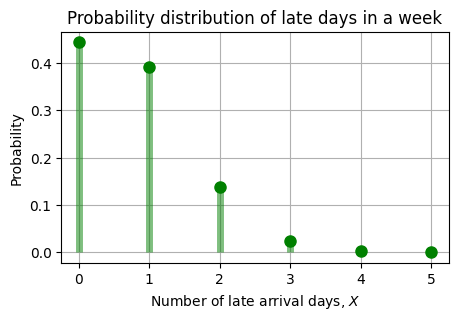

In [14]:
# Create a figure and grab the axis handle
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

# Plot the probability distribution
ax.plot(x_arr, binom_dist.pmf(x_arr), 'go', ms=8)
ax.vlines(x_arr, 0, binom_dist.pmf(x_arr), colors='g', lw=5, alpha=0.5)
ax.set_xlabel('Number of late arrival days, $X$')
ax.set_ylabel('Probability')
ax.set_title('Probability distribution of late days in a week')
ax.grid()
plt.show()

#### Q: What is the probability that he arrives late on 2 or fewer mornings?

In [15]:
k = 2
pr_leq2 = np.sum(binom_dist.pmf(x_arr[0:k+1]))
pr_leq2

0.9733881249999997

We can also manually calculate the probability using the formula
$$
    \begin{align}
        \mathrm{Pr}{\left(X\leq x\right)} 
        &= \mathrm{Pr}{\left(X=0\right)} + \mathrm{Pr}{\left(X=1\right)} + \cdots + \mathrm{Pr}{\left(X=x\right)} \\
        &= \sum_{k=0}^{x}{{n\choose k}p^k\left(1-p\right)^{n-k}}
    \end{align}
$$
and verify that it gives the same value as above.

In [16]:
k_arr = np.arange(k+1)              # Array of specific values of the random variable
np.sum(comb(n, k_arr)*(p**k_arr)*((1-p)**(n-k_arr)))

0.9733881249999997

#### Q: What is the probability that he arrives late on 3 or more mornings?

In [17]:
k = 3
pr_geq3 = np.sum(binom_dist.pmf(x_arr[3:]))
pr_geq3

0.026611874999999972

In [18]:
1 - pr_leq2

0.026611875000000285

In [19]:
k_arr = np.arange(k, n+1)           # Array of specific values of the random variable
np.sum(comb(n, k_arr)*(p**k_arr)*((1-p)**(n-k_arr)))

0.026611874999999993

#### Q: What is mean number of mornings he arrives late?

In [20]:
binom_dist.mean()

0.75

We can also manually calculate the mean using the formula
$$
    \mathbb{E}{\left[X\right]} = np
$$
and verify that it gives the same value as above.

In [21]:
n*p

0.75

#### Q: What is variance of the number of mornings he arrives late?

In [22]:
binom_dist.var()

0.6375

We can also manually calculate the variance using the formula
$$
    \mathrm{Var}{\left(X\right)} = np\left(1-p\right)
$$
and verify that it gives the same value as above.

In [23]:
n*p*(1-p)

0.6375

### Binomial Approximation

Suppose that in Anthony's scenario, he collects observations from 40 days of walking to school.

In [24]:
n, p = 40, 0.15
x_arr = np.arange(n+1)              # Range of values of the random variable

#### Q: Plot the probability distribution of the number of late days and show that it can be approximated by a normal distribution.

In [25]:
# Create the binomial distribution
binom_dist2 = stats.binom(n=n, p=p)

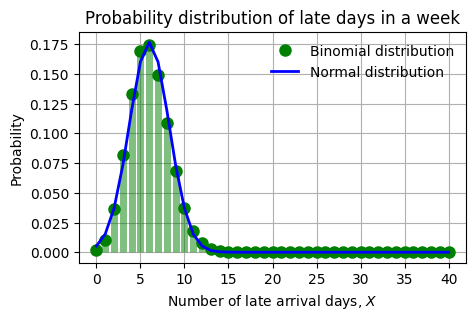

In [26]:
# Create a figure and grab the axis handle
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

# Plot the binomial probability distribution
ax.plot(x_arr, binom_dist2.pmf(x_arr), 'go', ms=8, label="Binomial distribution")
ax.vlines(x_arr, 0, binom_dist2.pmf(x_arr), colors='g', lw=5, alpha=0.5)

# Plot the normal probability distribution.
# Note that `scale` is standard deviation, not variance.
ax.plot(x_arr, stats.norm.pdf(x_arr, loc=n*p, scale=np.sqrt(n*p*(1-p))), 
        'b-', lw=2, label="Normal distribution")

# Add plot annotations and display the plot
ax.set_xlabel('Number of late arrival days, $X$')
ax.set_ylabel('Probability')
ax.set_title('Probability distribution of late days in a week')
ax.legend(loc='best', frameon=False)
ax.grid()
plt.show()

We see indeed that as $n$ gets large, the binomial distribution can be approximated by a normal distribution:
$$
    X \sim \mathcal{N}\left(np,\,np\left(1-p\right)\right).
$$

## Continuous Probability Distributions

### Continuous Uniform Distribution

Suppose that a bus arrives at a bus stop at every 10-minute interval. Passengers arrive at the bus stop and wait for the bus. Assume that the waiting time is uniformly distributed.

In [27]:
a, b = 0.0, 10.0                    # Waiting time lower and upper bounds
x_arr = np.linspace(a, b, 1000)     # Array of values of the random variable (for plotting)

#### Q: Plot the probability distribution of the waiting time.

In [28]:
# Create the continuous uniform distribution
unif_dist = stats.uniform(loc=a, scale=b)

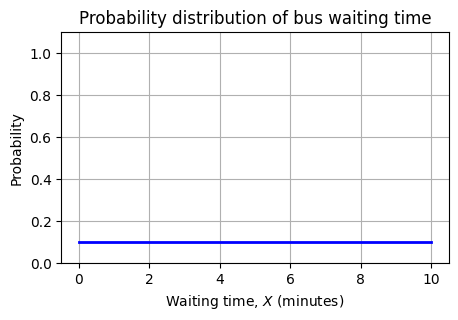

In [29]:
# Create a figure and grab the axis handle
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

# Plot the probability distribution
ax.plot(x_arr, unif_dist.pdf(x_arr), 'b-', lw=2)
ax.set_xlabel('Waiting time, $X$ (minutes)')
ax.set_ylabel('Probability')
ax.set_title('Probability distribution of bus waiting time')
ax.set_ylim(0, 1.1)
ax.grid()
plt.show()

#### Q: What is the probability that a passenger who arrives at the bus stop will have to wait between 5 and 7 minutes?

In [30]:
a1, b1 = 5, 7
pr = (b1-a1) * unif_dist.pdf(a1)
pr

0.2

### Normal Distribution

The time, in minutes, taken by Nicholas to install an optical network unit (ONU) may be assumed to be normally distributed, with a mean of 26 minutes and a standard deviation of 4 minutes.

In [31]:
mu, sigma = 26, 4
x_arr = np.linspace(mu-6*sigma, mu+6*sigma, 1000)   # Array of values of the random variable (for plotting)

#### Q: Plot the probability distribution of the installation time.

In [32]:
# Create the normal distribution
norm_dist = stats.norm(loc=mu, scale=sigma)

We can confirm that the created distribution indeed has the correct mean and standard deviation.

In [33]:
print(norm_dist.mean())
print(norm_dist.std())

26.0
4.0


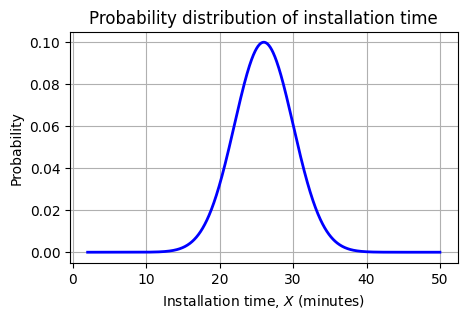

In [34]:
# Create a figure and grab the axis handle
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

# Plot the probability distribution
ax.plot(x_arr, norm_dist.pdf(x_arr), 'b-', lw=2)
ax.set_xlabel('Installation time, $X$ (minutes)')
ax.set_ylabel('Probability')
ax.set_title('Probability distribution of installation time')
ax.grid()
plt.show()

#### Q: What is the probability that for a random ONU installation, Nicholas takes less than 20 minutes?

We want to find $\mathrm{Pr}\left(X<20\right)$.

In [35]:
x = 20
pr = norm_dist.cdf(x)
pr

0.06680720126885806

We can also manually calculate this by standardising and using the $z$-statistic:
$$
    z = \frac{x-\mu}{\sigma},
$$
and then find $\mathrm{Pr}\left(Z<z\right)$.

In [36]:
z = (x-mu) / sigma
stats.norm.cdf(z)                   # norm() with default values for `loc` and `scale` is the standard normal distribution

0.06680720126885806

#### Q: What is the probability that for a random ONU installation, Nicholas takes more than 30 minutes?

We want to find $\mathrm{Pr}\left(X>30\right)=1-\mathrm{Pr}\left(X<30\right)$.

In [37]:
x = 30
pr = 1 - norm_dist.cdf(x)
pr

0.15865525393145707

Using the $z$-statistic,

In [38]:
z = (x-mu) / sigma
1 - stats.norm.cdf(z)

0.15865525393145707

#### Q: What is the probability that for a random ONU installation, Nicholas takes between 16 minutes and 36 minutes?

We want to find $\mathrm{Pr}\left(16<X<36\right)$.

In [39]:
x1, x2 = 16, 36
pr = np.diff(norm_dist.cdf([x1, x2])).item()
pr

0.9875806693484477

#### Q: What is the ONU installation time exceeded by 10% of installations (i.e., only 10% of the installation times exceed this value)?

In [40]:
pr = 0.1
norm_dist.ppf(1-pr)

31.1262062621784

## Summary

In this lesson, we covered how to analyse, apply, and plot discrete probability distributions including
- Generic distributions
- Binomial distribution

and continuous probability distributions including
- Uniform distribution
- Normal distribution